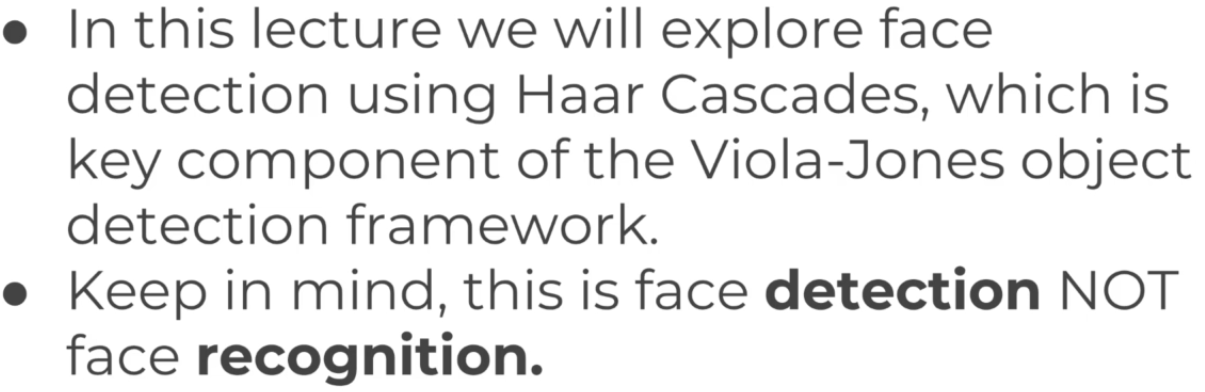

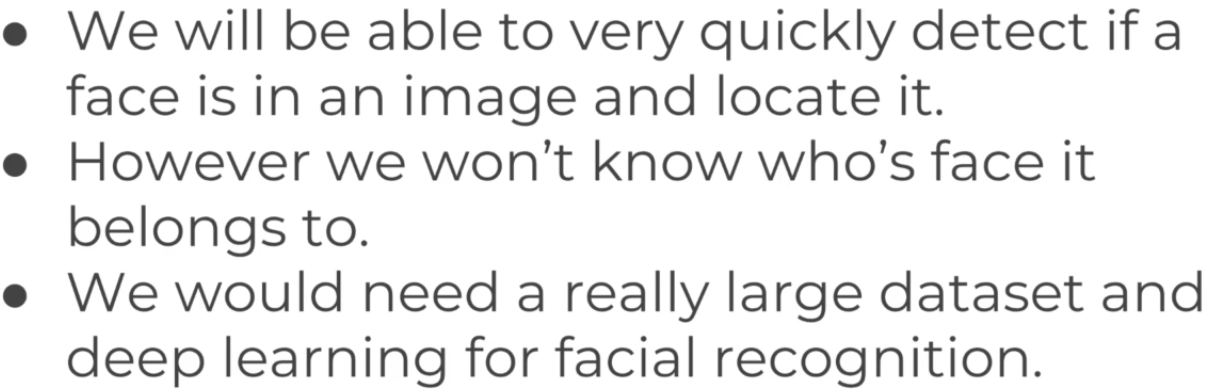

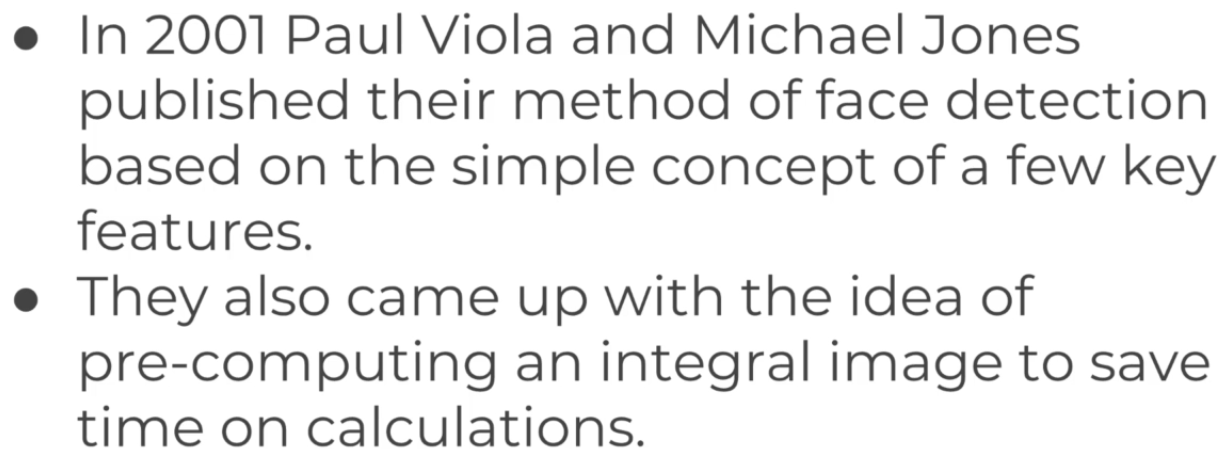

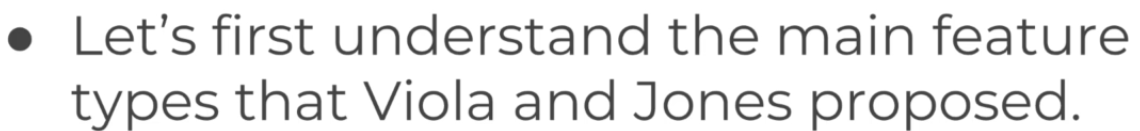

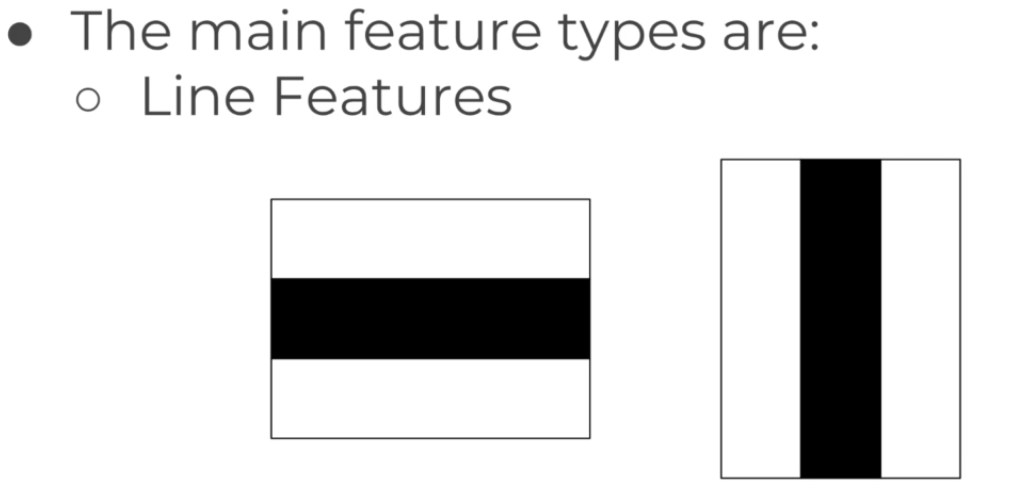

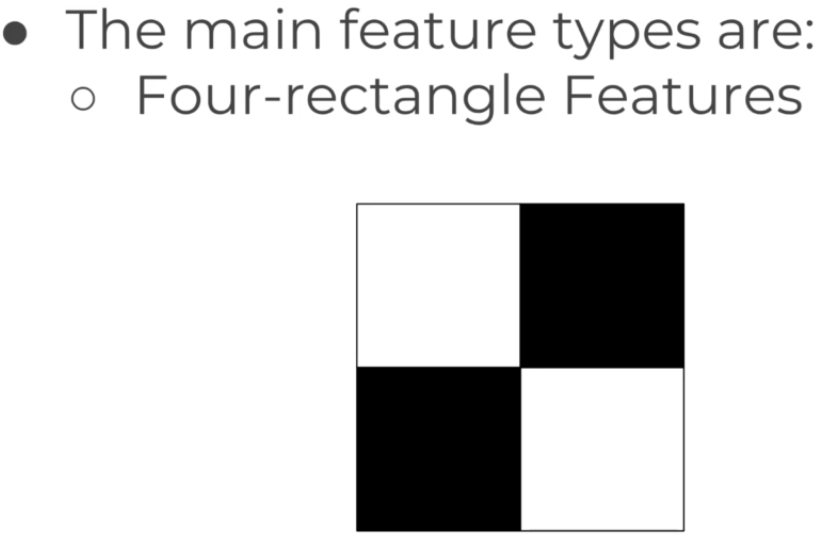

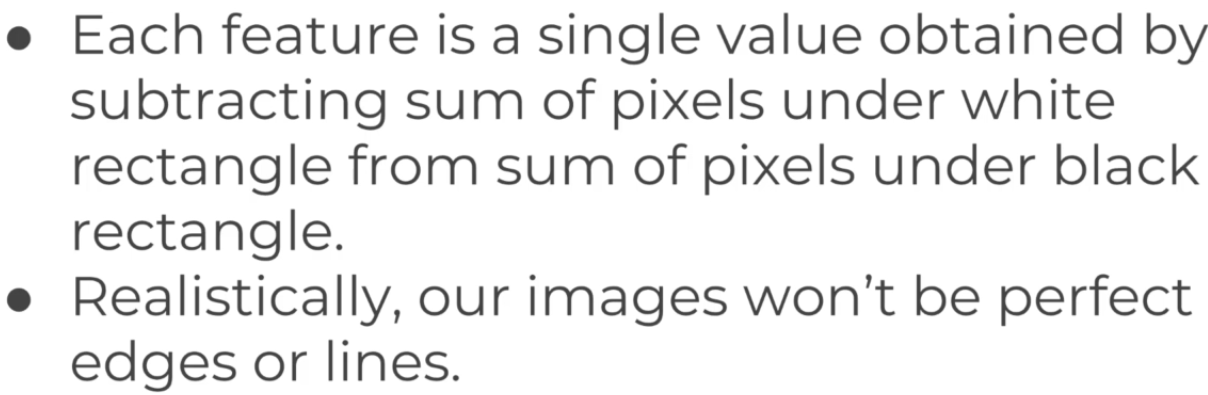

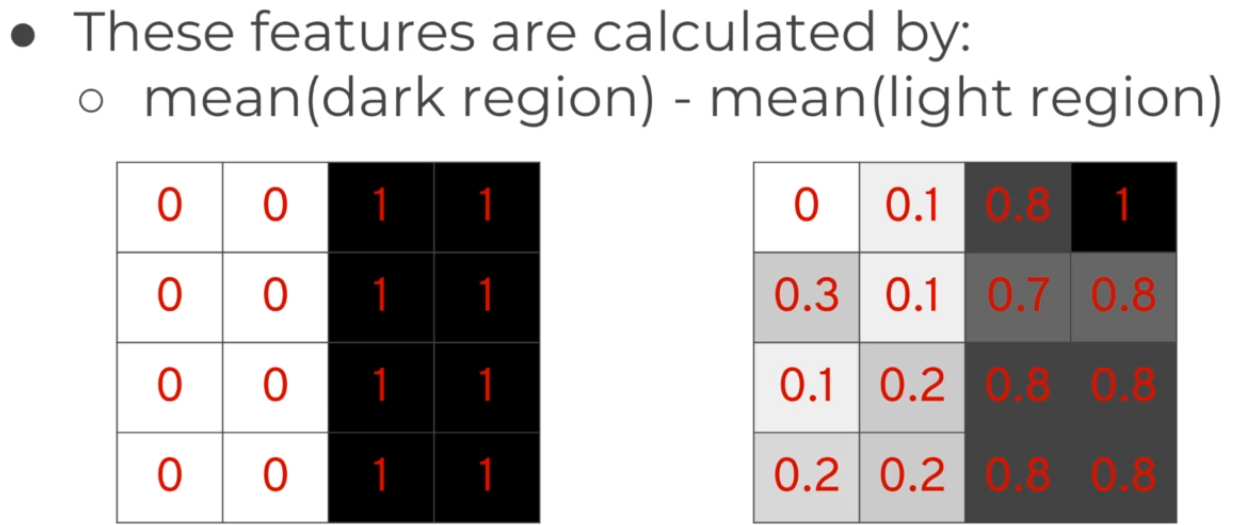

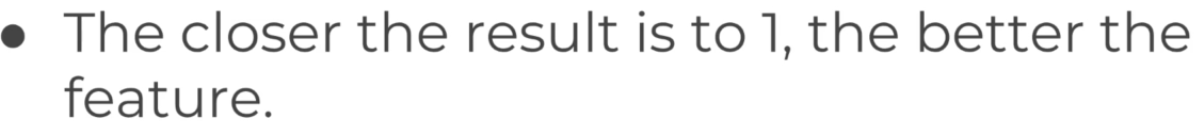

* We can see an edge in the right picture.
* What we do is we sum the dark region and the light region.
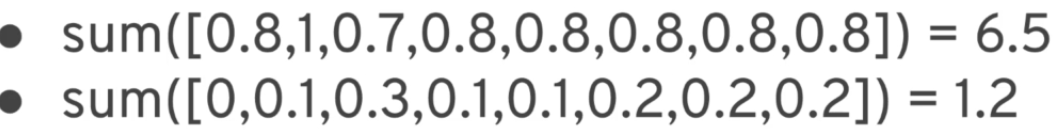

* We then take an average.
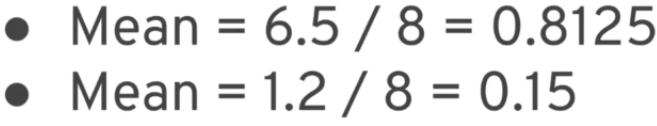

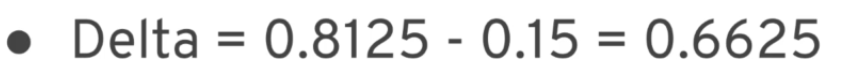

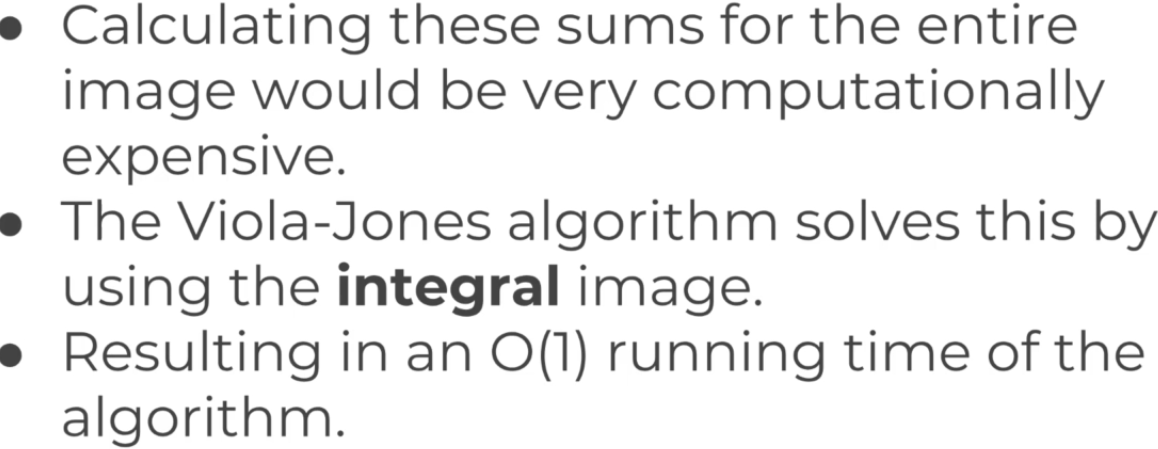

* The summed area table is obtained by summing values of cells.
* Like 31 is added to 2 becomes 33(see on the right table) , 33 added to 4 will be 37 and soo onnn
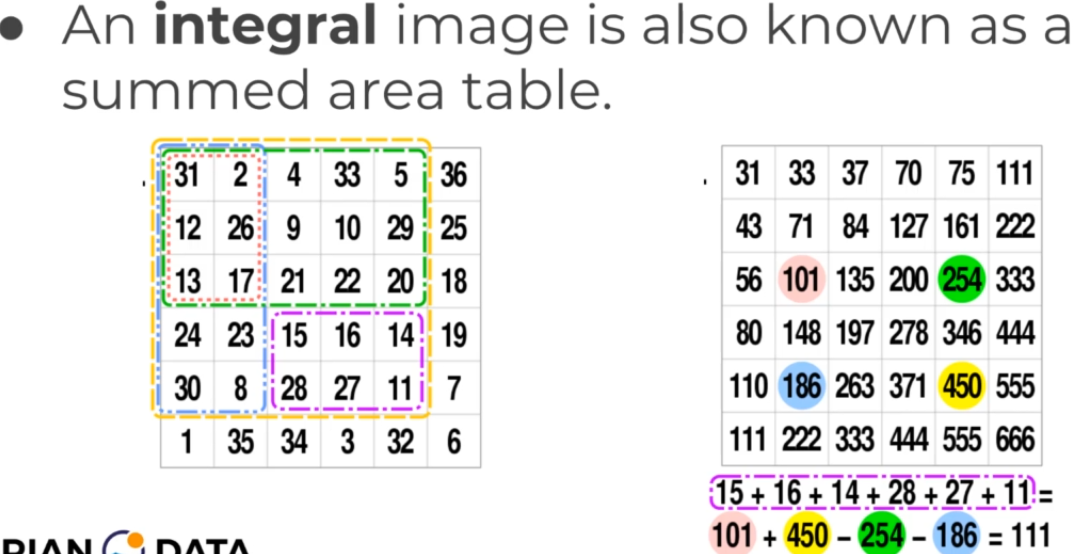

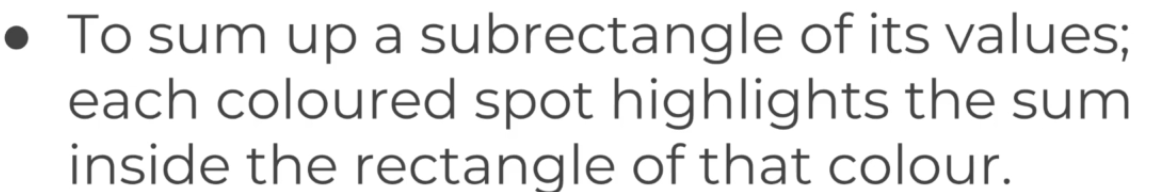
* Each colored spot is representing the sum of rectangle in the left table.
* 31+2+12+26+13+17 = 101

## This helps the algorithm in helping subtract bright region from dark region.
## The process becomes very fast if we have access to integral table.

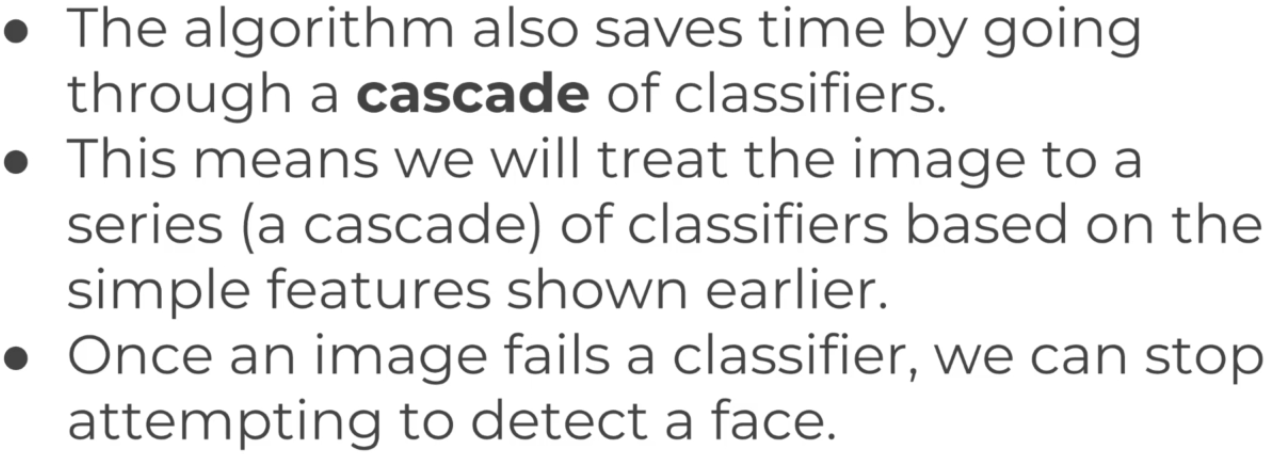

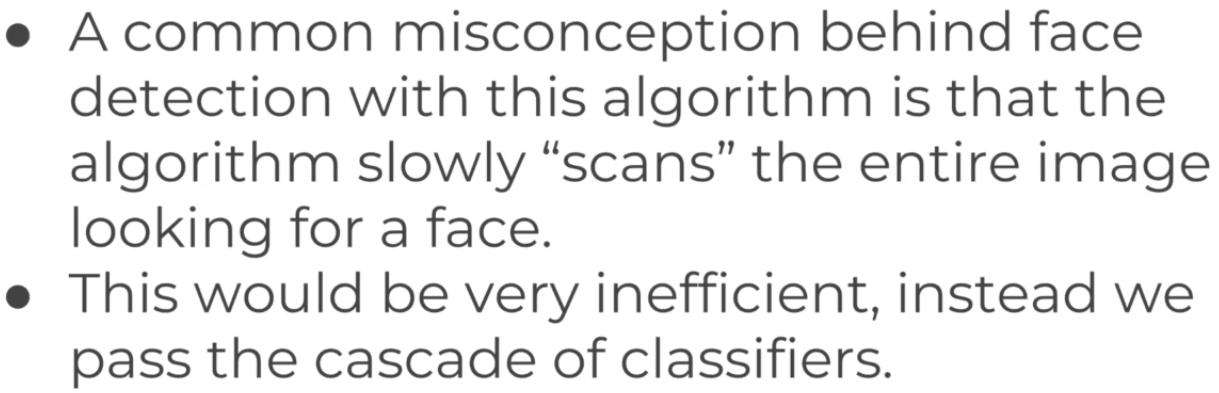

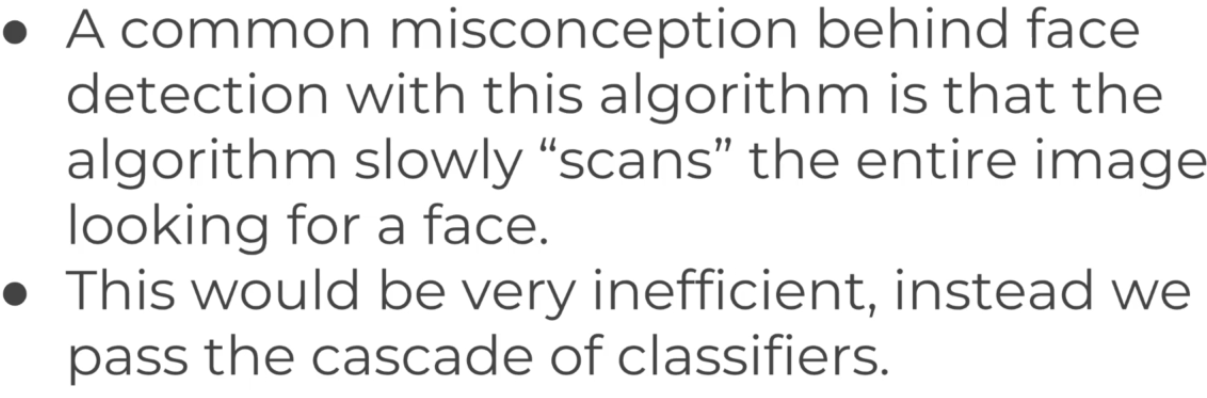

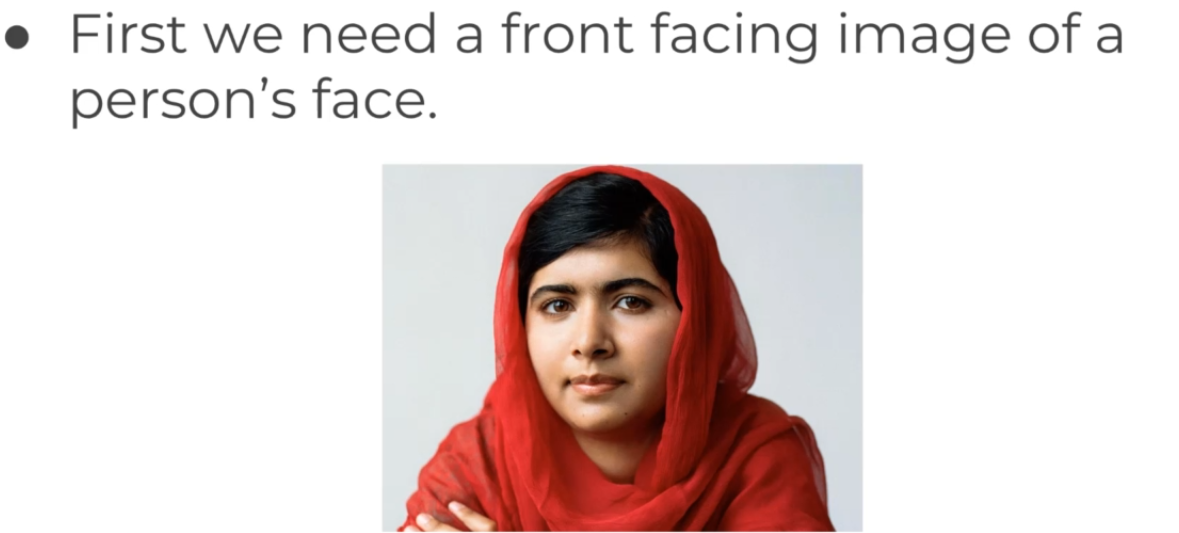

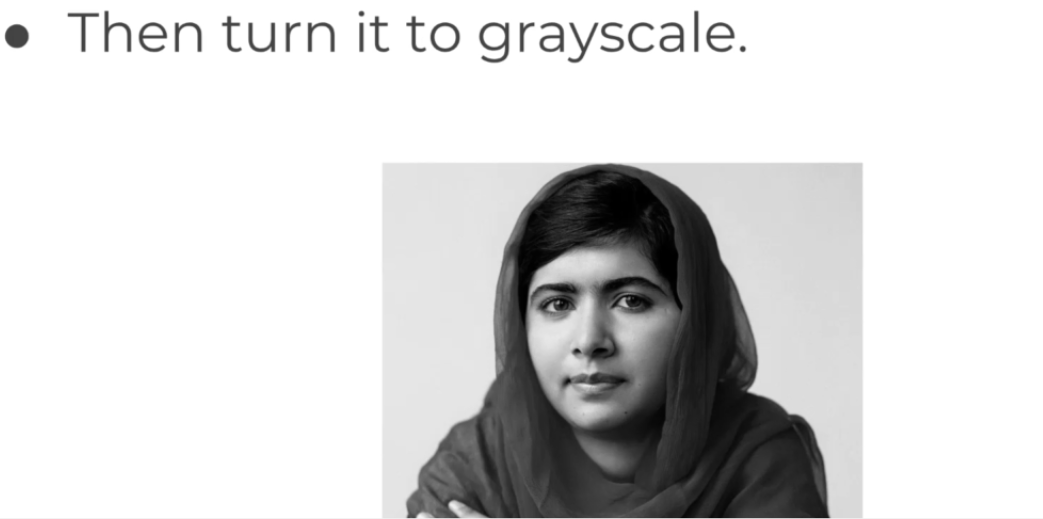

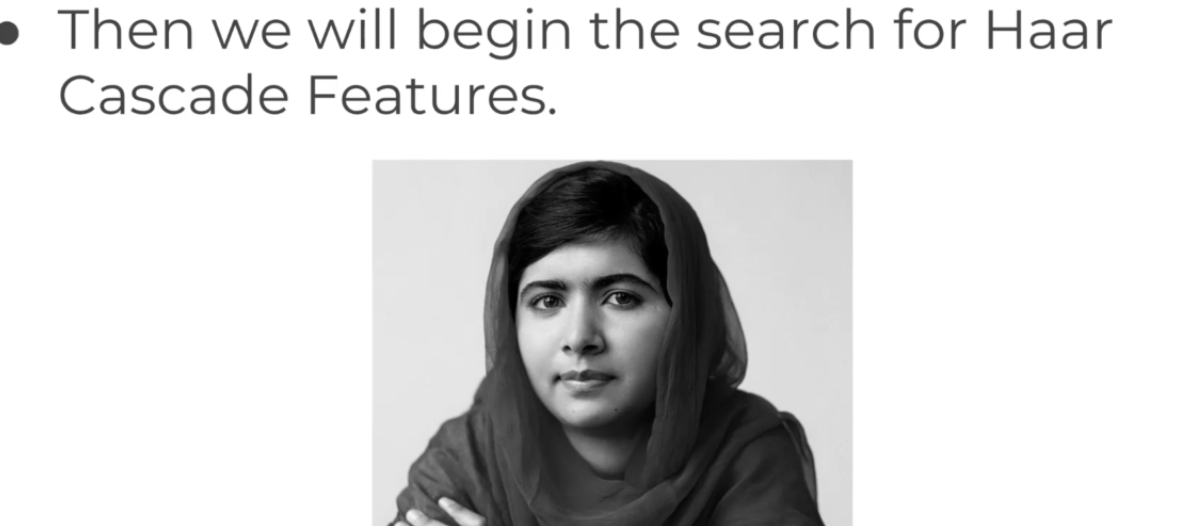

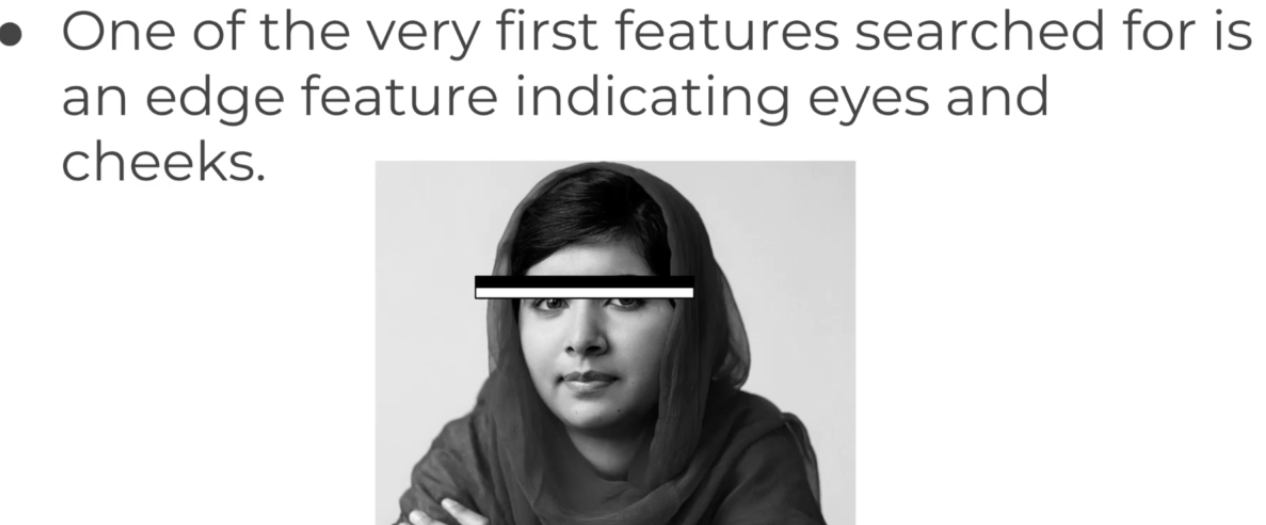
* Because the eyes would be a darker region than light cheek region.

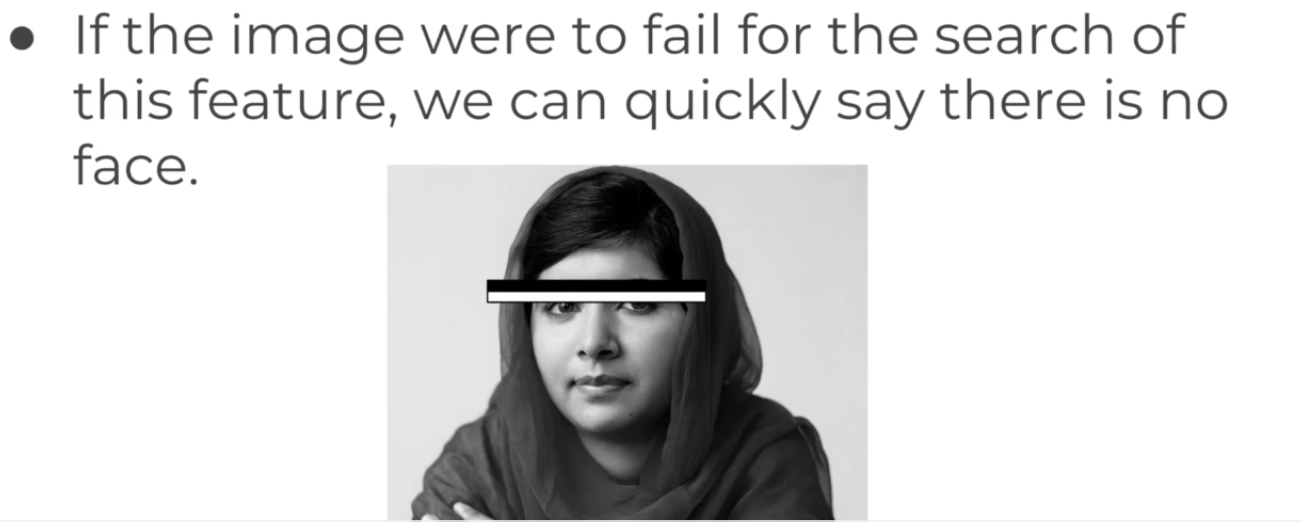

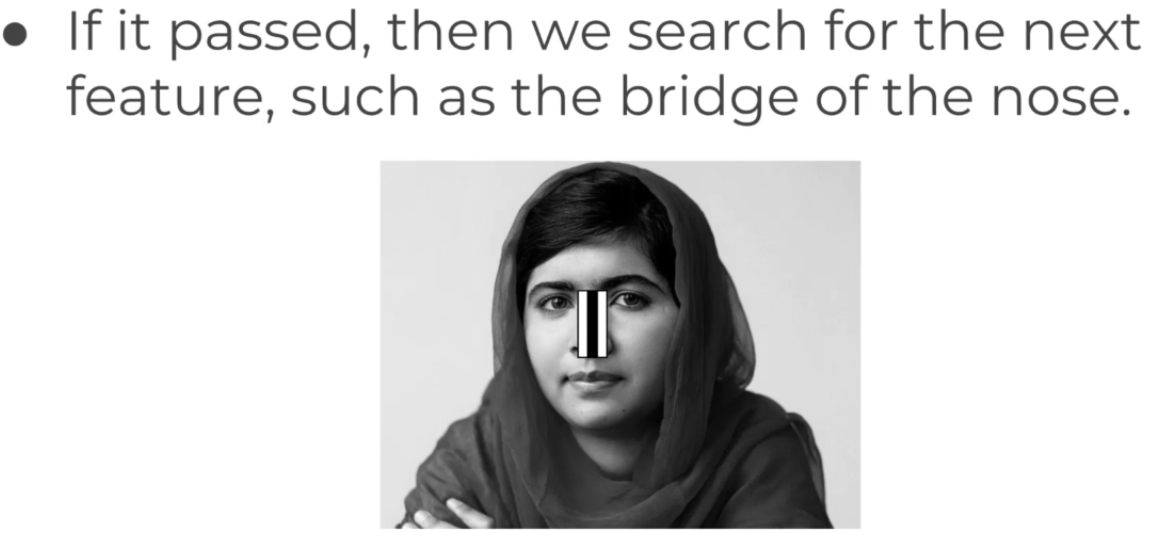

### This process keeps going and going scanning the features untill you pass majority of the,

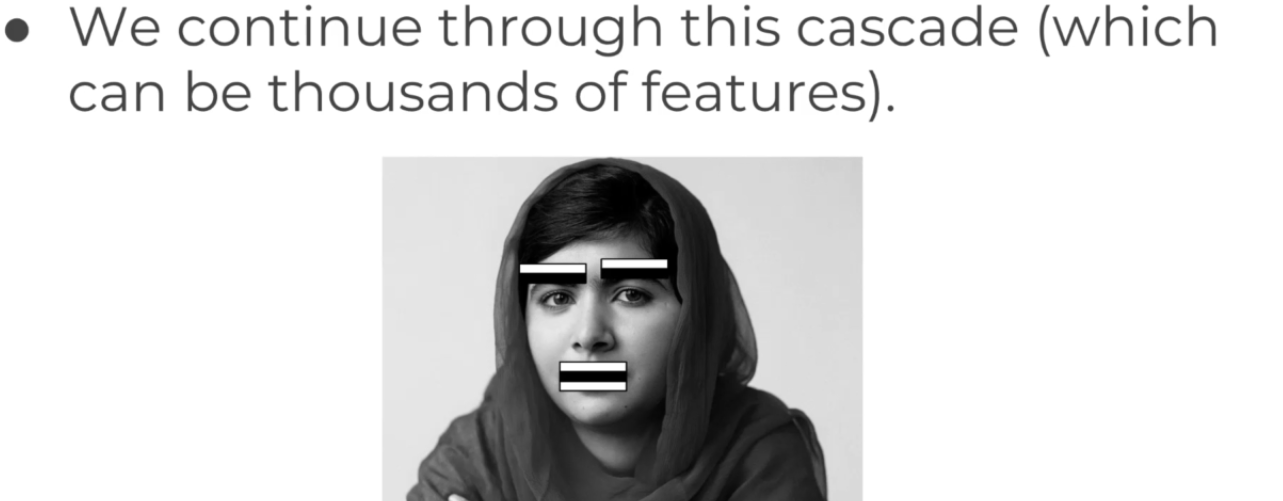

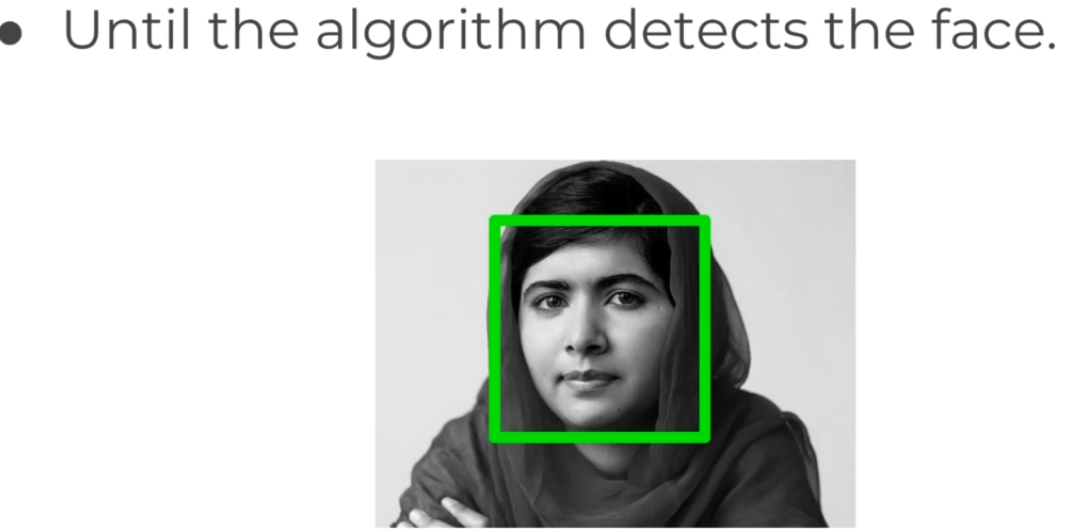

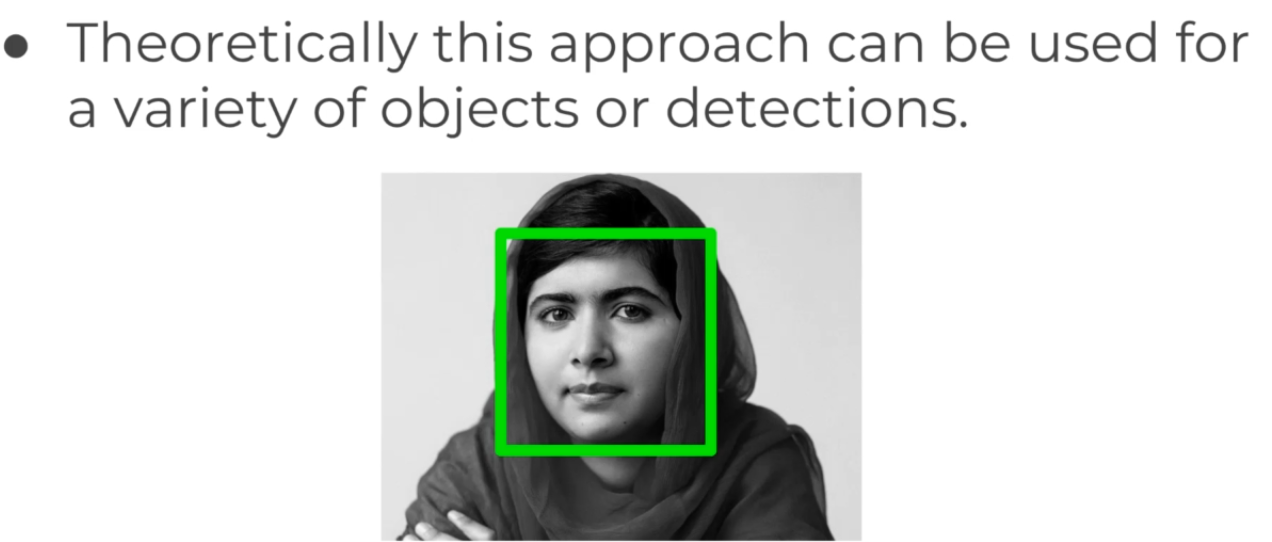

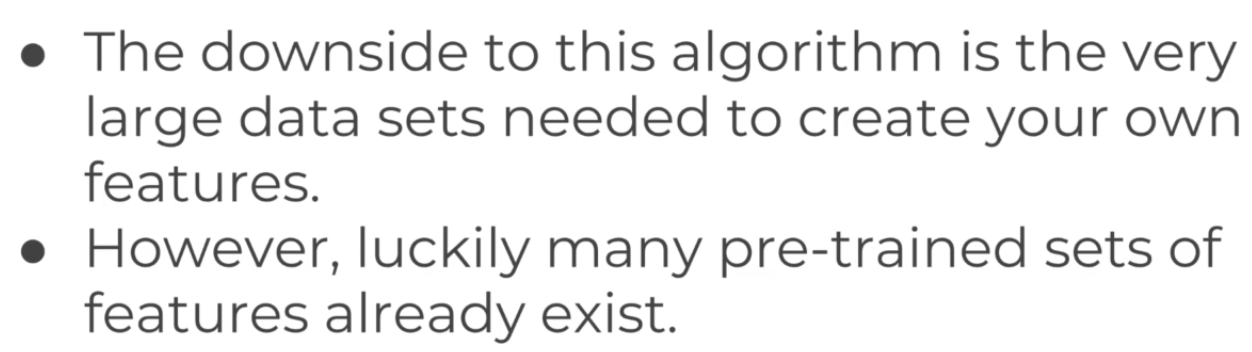

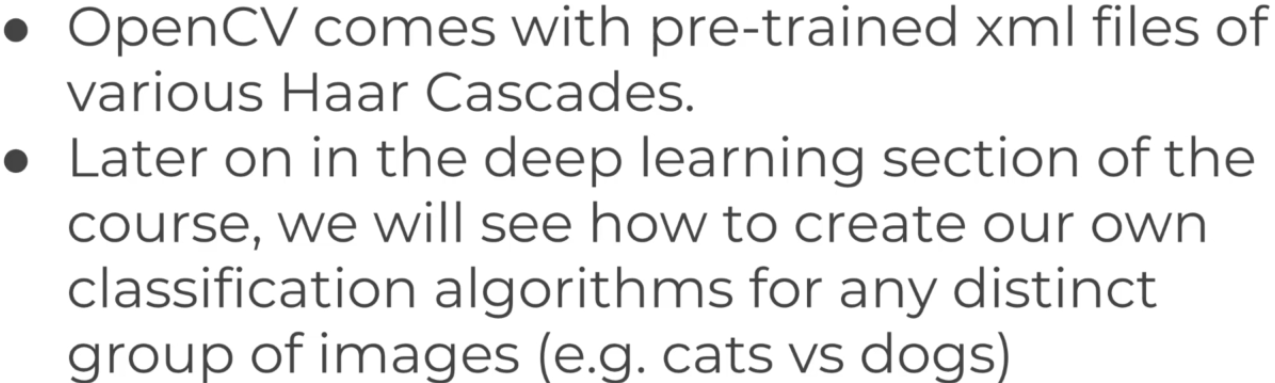

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
nadia = cv.imread('../Data/Nadia_Murad.jpg',0)
denis = cv.imread('../Data/Denis_Mukwege.jpg',0)
solvay = cv.imread('../Data/solvay_conference.jpg',0)

## <center>We have pretrained XML files of different features that we are going to use<center/>

## <center>Face Detection<center/>

* Lets try buliding a cascade classifier of frontal face
* The classifier we used below is a list of 6000 classifier/feature that are passed through the image to see if it fits all those features that will help finding if there is face or not.

In [3]:
faceCascade = cv.CascadeClassifier('../Data/haarcascades/haarcascade_frontalface_default.xml')

In [4]:
def detectFace(img):
    
    face_img = img.copy() # making a copy to not change the main image
    
    # detect features of passed image
    face_rectangle = faceCascade.detectMultiScale(face_img)
    
    # drawing a rectangle
    for (x,y,w,h) in face_rectangle:
        cv.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),5)

    return face_img

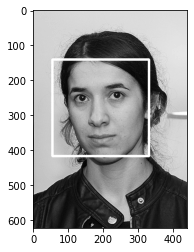

In [5]:
res = detectFace(nadia)
plt.imshow(res,cmap = 'gray')

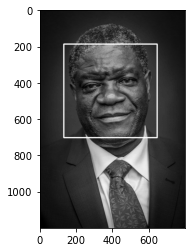

In [6]:
res = detectFace(denis)
plt.imshow(res,cmap = 'gray')

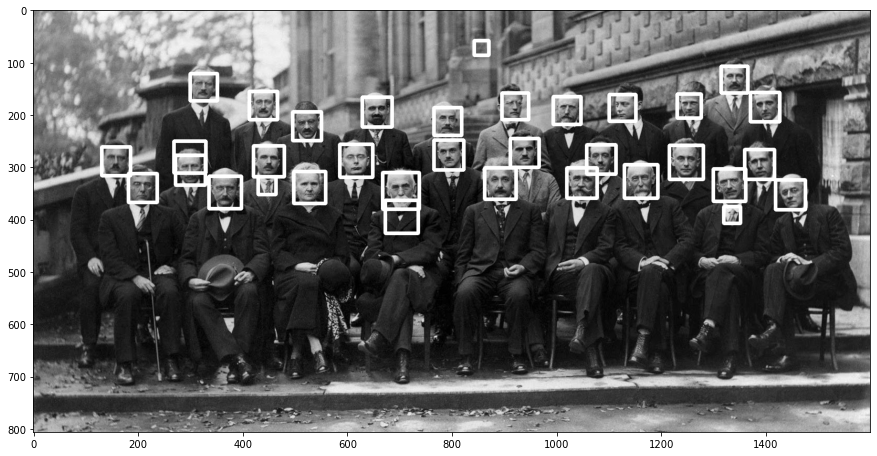

In [7]:
res = detectFace(solvay)
f = plt.figure(figsize=(15,15))
f = f.add_subplot(111)
f.imshow(res,cmap = 'gray')

* We can observe that all the faces were detected but some faces are having two rectangles and there are some extra rectangles having no faces.
* We can tackle this by utilizing the paramters of detectMulitscale.
    * **scaleFactor**  : specifying how much the image size is reduced at each image scale.
    * **minNeighbors**  : specifying how many neighbors each candidate rectangle should have to retain it.
* When the algorithm detect faces using cascade it draws multiple rectangles on the same area in the image where it thinks it found the faces so if multiple rectangles are near the same area or have a minimum number of neighbors then the algo decides where the face is.

In [8]:
def AdjdetectFace(img):
    
    face_img = img.copy() # making a copy to not change the main image
    
    # detect features of passed image
    face_rectangle = faceCascade.detectMultiScale(face_img,scaleFactor = 1.3,minNeighbors = 4)
    
    # drawing a rectangle
    for (x,y,w,h) in face_rectangle:
        cv.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),5)

    return face_img

* We can see that algorithm detected faces perfectly when we adjusted parameters but it came with a cost that ppl that are not directly looking the camera are not detected.

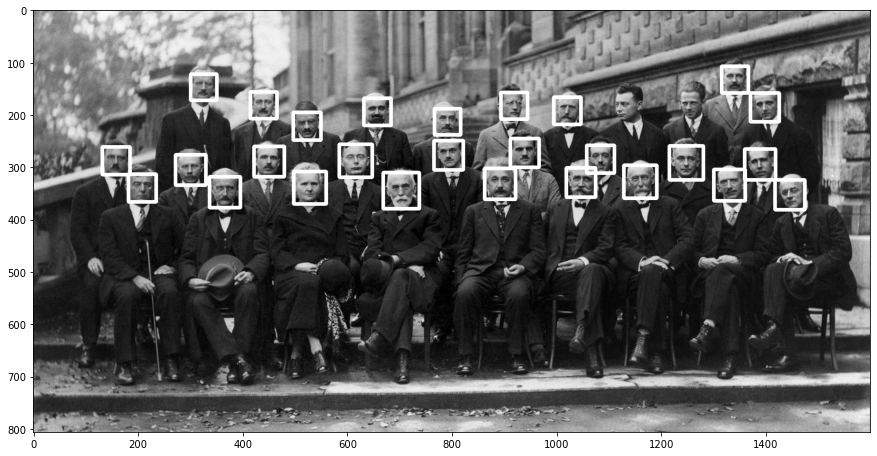

In [9]:
res = AdjdetectFace(solvay)
f = plt.figure(figsize=(15,15))
f = f.add_subplot(111)
f.imshow(res,cmap = 'gray')

## <center>Eyes<center/>

In [10]:
eyeCascade = cv.CascadeClassifier('../Data/haarcascades/haarcascade_eye.xml')

In [11]:
def detectEyes(img):
    
    eye_img = img.copy() # making a copy to not change the main image
    
    # detect features of passed image
    eye_rectangle = eyeCascade.detectMultiScale(eye_img)
    
    # drawing a rectangle
    for (x,y,w,h) in eye_rectangle:
        cv.rectangle(eye_img,(x,y),(x+w,y+h),(255,255,255),5)

    return eye_img

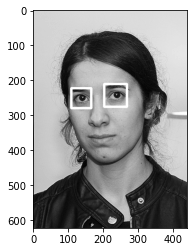

In [12]:
res = detectEyes(nadia)
plt.imshow(res,cmap = 'gray')

* In the picture below the white area of the eyes of denis is black as the picture is photoshoped. That's why algorithm is not able to detect denis' eyes.
* The cascade is trained to find these white features in the eyes to detect them.

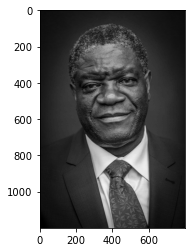

In [13]:
res = detectEyes(denis)
plt.imshow(res,cmap = 'gray')

## Lets detect faces using live camera

## FOR EYES

In [14]:
cap = cv.VideoCapture(0)

while True:
    
    ret , frame = cap.read(0)
        
    frame = detectEyes(frame)
    
    cv.imshow('Face Detection',frame)
    
    
    k = cv.waitKey(1)
    if k == 27:
        break

cv.release()
cv.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'release'

## FOR FACE

In [ ]:
cap = cv.VideoCapture(0)

while True:
    
    ret , frame = cap.read(0)
        
    frame = detectFace(frame)
    
    cv.imshow('Face Detection',frame)
    
    
    k = cv.waitKey(1)
    if k == 27:
        break

cv.release()
cv.destroyAllWindows()